In [1]:
import os
import openai

# .envファイルからAPIキーを読み込む
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai.api_key = os.environ['OPENAI_API_KEY']

In [2]:
# from langchain.chat_models import ChatOpenAI
# from langchain.llms import OpenAI
# from langchain.agents import create_pandas_dataframe_agent
# from langchain.agents.agent_types import AgentType

import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

# pandasの表示桁数のオプション
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# データの読み込み
df = pd.read_csv('../data/housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88               41.00       880.00          129.00   
1    -122.22     37.86               21.00      7099.00         1106.00   
2    -122.24     37.85               52.00      1467.00          190.00   
3    -122.25     37.85               52.00      1274.00          235.00   
4    -122.25     37.85               52.00      1627.00          280.00   

   population  households  median_income  median_house_value ocean_proximity  
0      322.00      126.00           8.33           452600.00        NEAR BAY  
1     2401.00     1138.00           8.30           358500.00        NEAR BAY  
2      496.00      177.00           7.26           352100.00        NEAR BAY  
3      558.00      219.00           5.64           341300.00        NEAR BAY  
4      565.00      259.00           3.85           342200.00        NEAR BAY

In [4]:
# データフレームを操作するエージェントの作成
llm = OpenAI()
pandas_ai = PandasAI(llm=llm)

## データ分析をする

In [9]:
pandas_ai(df, '各変数の欠損値の数を計算してください。')

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df2 = pandas_ai(df, '部屋数が1000部屋以上の物件のデータを抽出してください。')
df2.describe()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count   18320.00  18320.00            18320.00     18320.00        18145.00   
mean     -119.56     35.61               28.15      2891.36          587.01   
std         2.00      2.13               12.47      2184.28          421.42   
min      -124.35     32.55                1.00      1000.00          117.00   
25%      -121.80     33.93               18.00      1670.00          340.00   
50%      -118.48     34.25               28.00      2307.00          472.00   
75%      -117.99     37.70               36.00      3320.25          685.00   
max      -114.31     41.95               52.00     39320.00         6445.00   

       population  households  median_income  median_house_value  
count    18320.00    18320.00       18320.00            18320.00  
mean      1546.60      545.19           3.95           211103.79  
std       1135.83      381.34           1.87           115637.47  
min         27.00       11.00           0.55            22500.00  
25%        894.00      322.00           2.65           124300.00  
50%       1262.00      443.00           3.62           184200.00  
75%       1820.00      636.00           4.83           269600.00  
max      35682.00     6082.00          15.00           500001.00

In [7]:
df3 = pandas_ai(df2, '"ocean_proximity"をone-hotエンコーディングしてください。')
df3

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86               21.00      7099.00         1106.00   
2        -122.24     37.85               52.00      1467.00          190.00   
3        -122.25     37.85               52.00      1274.00          235.00   
4        -122.25     37.85               52.00      1627.00          280.00   
6        -122.25     37.84               52.00      2535.00          489.00   
...          ...       ...                 ...          ...             ...   
20634    -121.56     39.27               28.00      2332.00          395.00   
20635    -121.09     39.48               25.00      1665.00          374.00   
20637    -121.22     39.43               17.00      2254.00          485.00   
20638    -121.32     39.43               18.00      1860.00          409.00   
20639    -121.24     39.37               16.00      2785.00          616.00   

       population  households  median_income  median_house_value  \
1         2401.00     1138.00           8.30           358500.00   
2          496.00      177.00           7.26           352100.00   
3          558.00      219.00           5.64           341300.00   
4          565.00      259.00           3.85           342200.00   
6         1094.00      514.00           3.66           299200.00   
...           ...         ...            ...                 ...   
20634     1041.00      344.00           3.71           116800.00   
20635      845.00      330.00           1.56            78100.00   
20637     1007.00      433.00           1.70            92300.00   
20638      741.00      349.00           1.87            84700.00   
20639     1387.00      530.00           2.39            89400.00   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
6                              0                       0   
...                          ...                     ...   
20634                          0                       1   
20635                          0                       1   
20637                          0                       1   
20638                          0                       1   
20639                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
1                           0                         1   
2                           0                         1   
3                           0                         1   
4                           0                         1   
6                           0                         1   
...                       ...                       ...   
20634                       0                         0   
20635                       0                         0   
20637                       0                         0   
20638                       0                         0   
20639                       0                         0   

       ocean_proximity_NEAR OCEAN  
1                               0  
2                               0  
3                               0  
4                               0  
6                               0  
...                           ...  
20634                           0  
20635                           0  
20637                           0  
20638                           0  
20639                           0  

[18320 rows x 14 columns]

In [15]:
# ショートカット
df_clean = pandas_ai.clean_data(df)
df_clean

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88               41.00       880.00          129.00   
1        -122.22     37.86               21.00      7099.00         1106.00   
2        -122.24     37.85               52.00      1467.00          190.00   
3        -122.25     37.85               52.00      1274.00          235.00   
4        -122.25     37.85               52.00      1627.00          280.00   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48               25.00      1665.00          374.00   
20636    -121.21     39.49               18.00       697.00          150.00   
20637    -121.22     39.43               17.00      2254.00          485.00   
20638    -121.32     39.43               18.00      1860.00          409.00   
20639    -121.24     39.37               16.00      2785.00          616.00   

       population  households  median_income  median_house_value  \
0          322.00      126.00           8.33           452600.00   
1         2401.00     1138.00           8.30           358500.00   
2          496.00      177.00           7.26           352100.00   
3          558.00      219.00           5.64           341300.00   
4          565.00      259.00           3.85           342200.00   
...           ...         ...            ...                 ...   
20635      845.00      330.00           1.56            78100.00   
20636      356.00      114.00           2.56            77100.00   
20637     1007.00      433.00           1.70            92300.00   
20638      741.00      349.00           1.87            84700.00   
20639     1387.00      530.00           2.39            89400.00   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20433 rows x 10 columns]

In [10]:
# ｢家あたりの人口｣カラムを作成する
df_４ = pandas_ai(df, '"population_per_household"列を作成してください。データフレームの"population"をデータフレームの"households"で割った値を代入してください。')

KeyboardInterrupt: 

In [7]:
df_４

''

In [8]:
# 欠損値の処理
df_impute_missing_values = pandas_ai(df, '欠損値を含まない行を抽出してください。')

In [9]:
pandas_ai(df_impute_missing_values, '各行の欠損値を集計してください。')

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
population_per_household    0
dtype: int64

In [39]:
pandas_ai(df_impute_missing_values, '各変数の欠損値の数を計算してください。')

''

In [20]:
# impute missing values
df_impute_missing_values = pandas_ai.impute_missing_values(df)

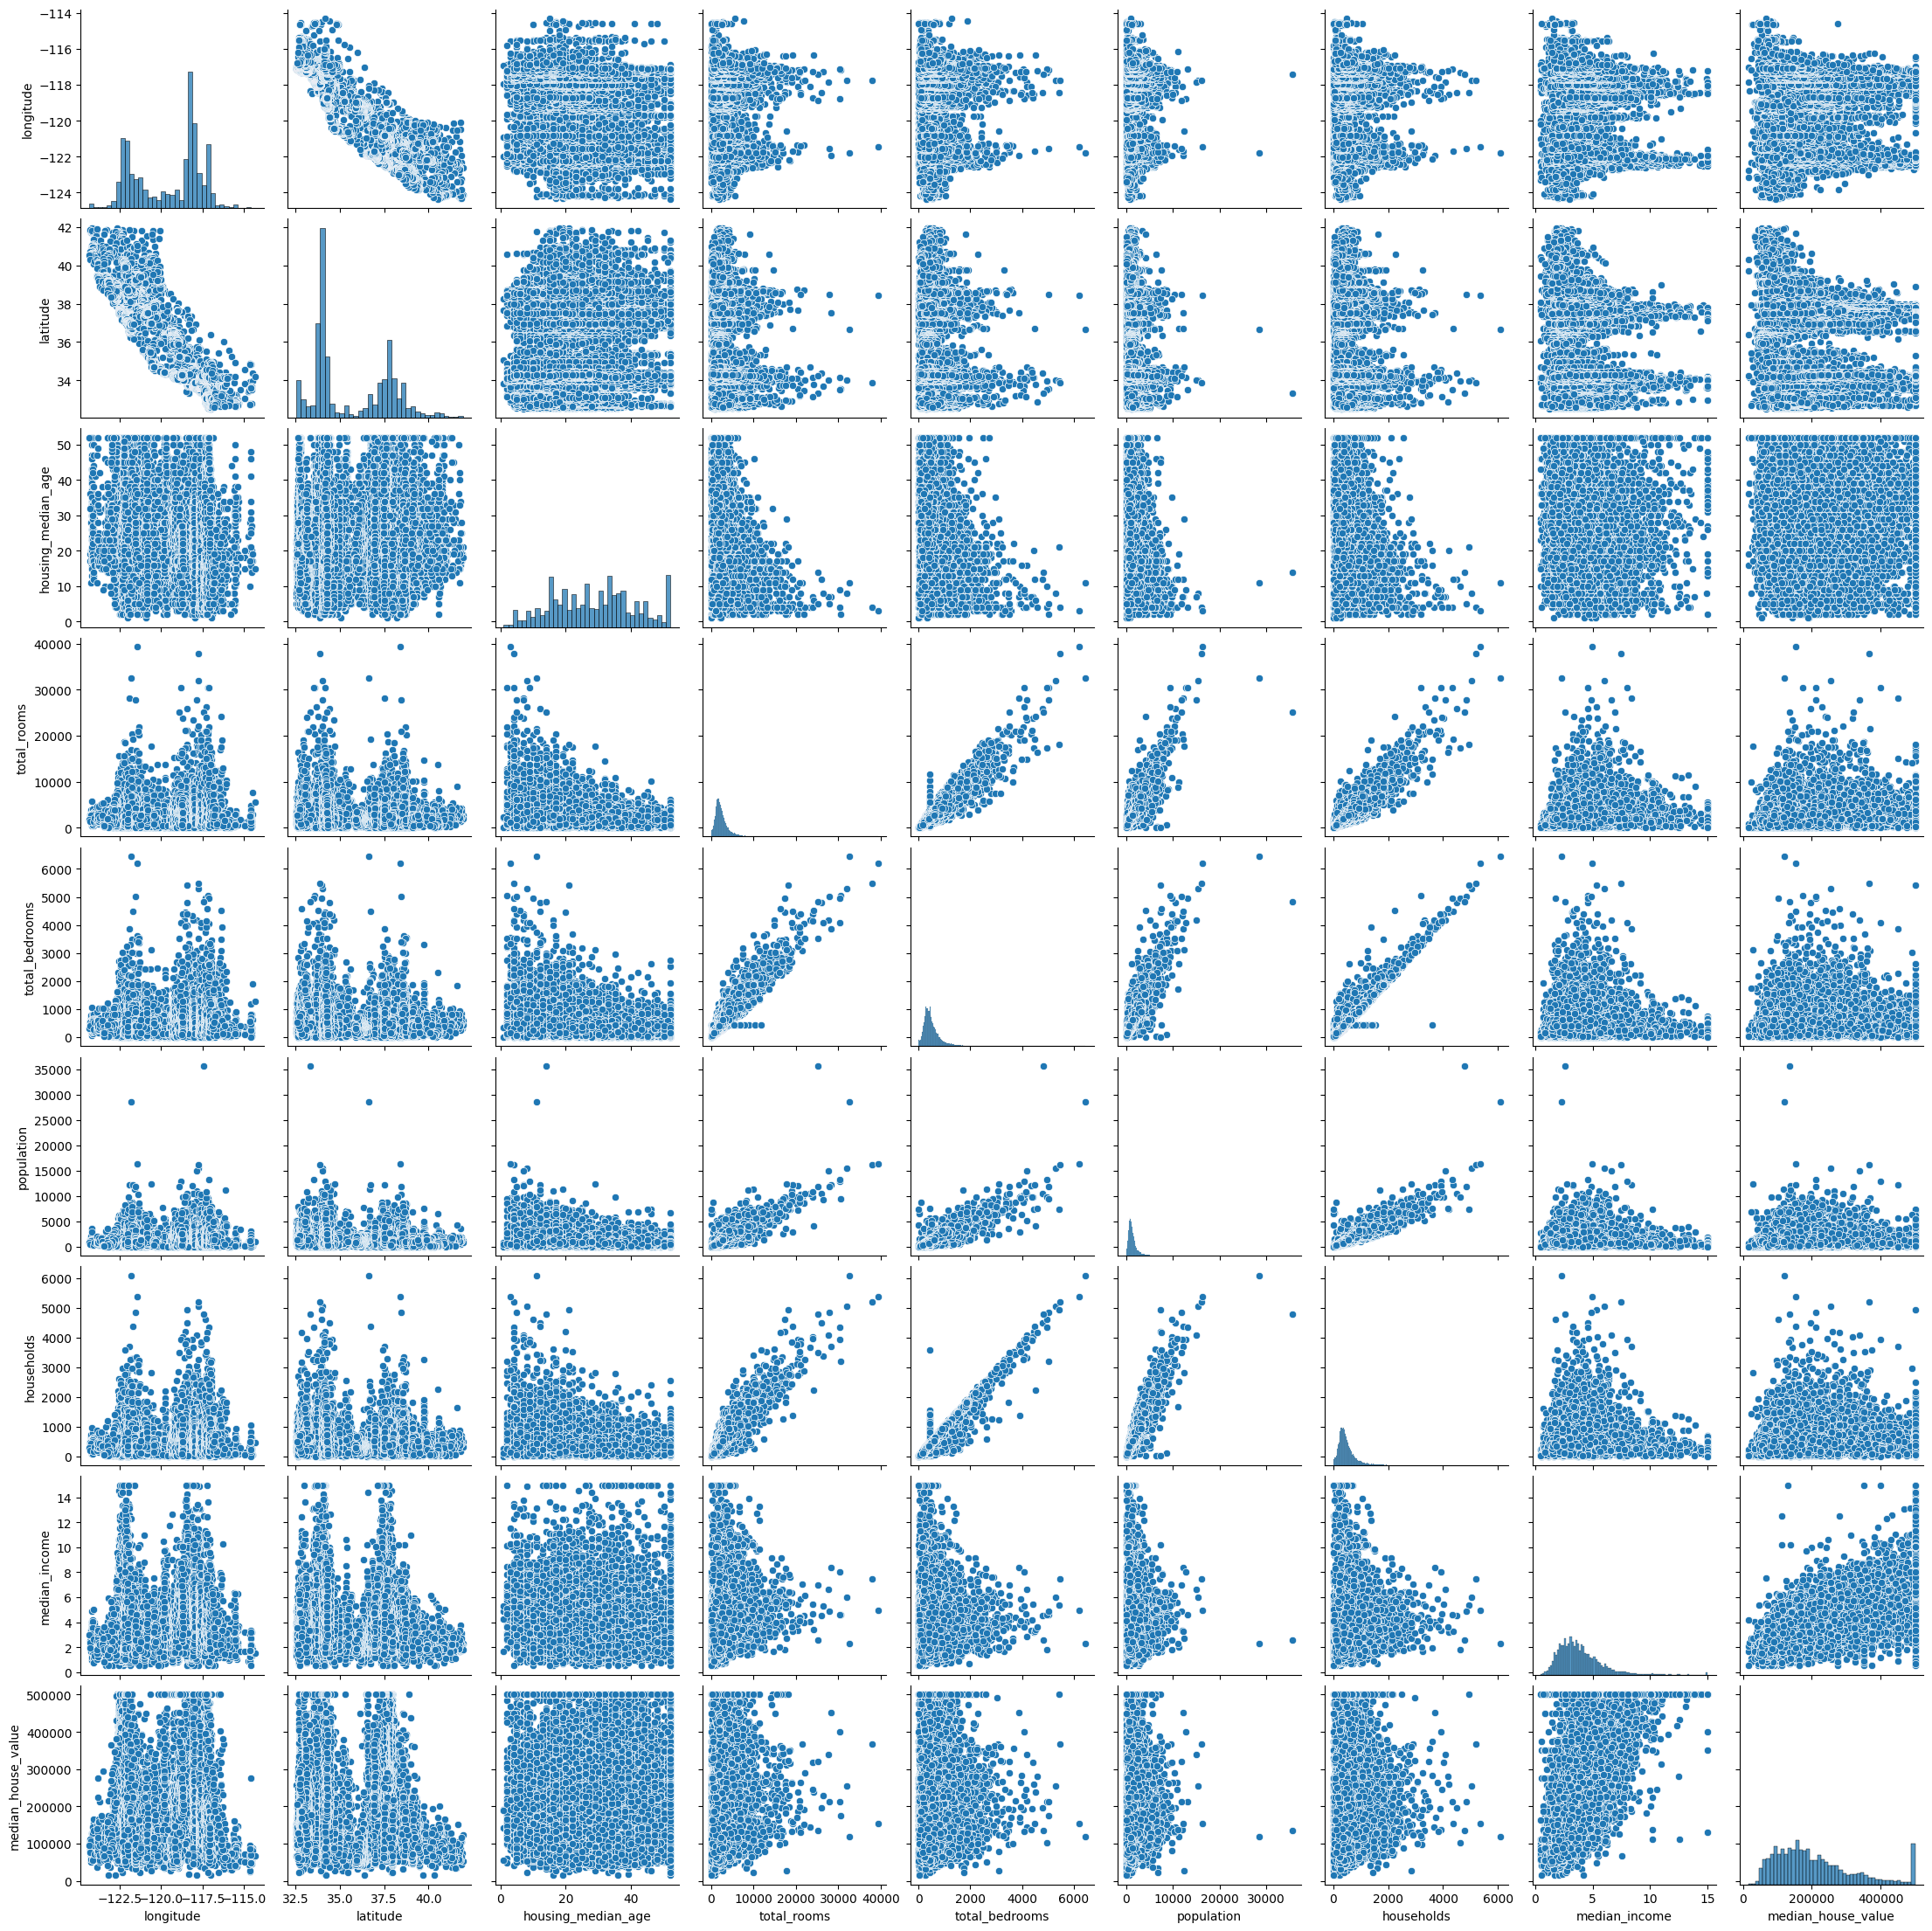

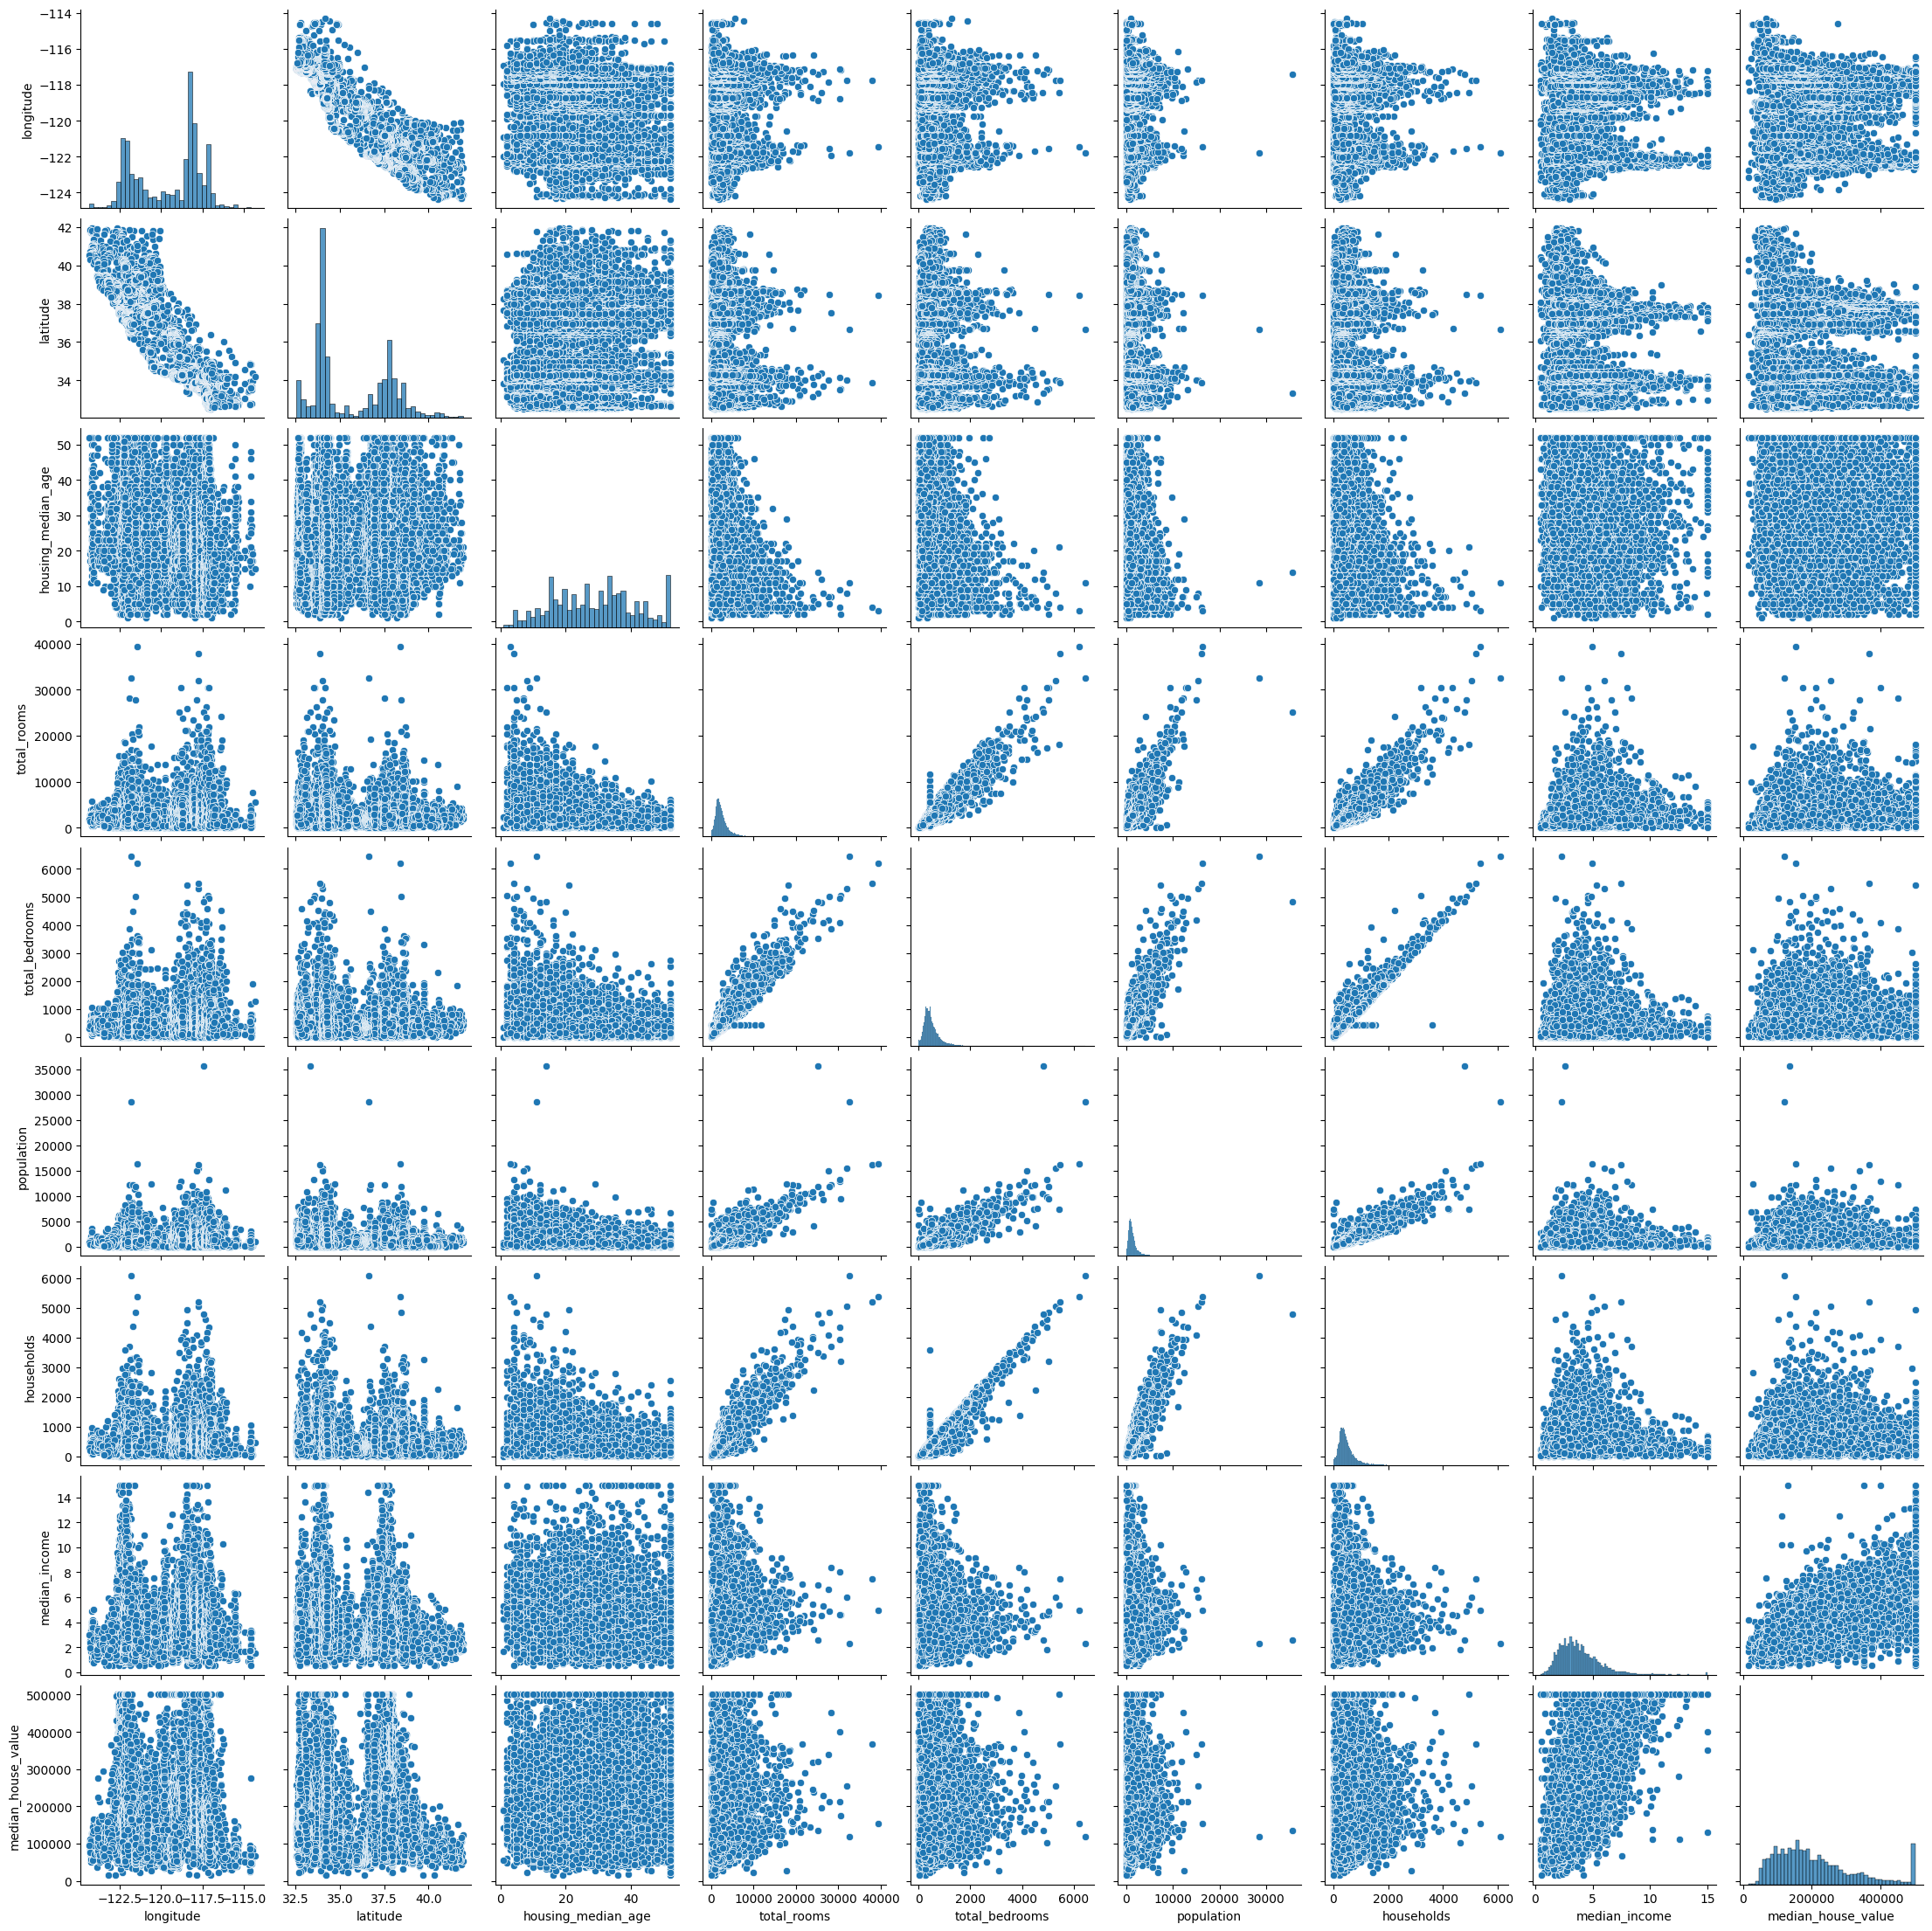

In [22]:
pandas_ai(df_impute_missing_values, '各変数の関係をペアプロットで可視化してください。')